TWITTER SENTIMENT ANALYSIS ALGORTHITM 
-> the code was written as part of the Data Analytics and Machine Learning class of Frankfurt School of Finance and Management 2020 intake 
-> the algorithm produced superior accuracy over 200 algorithms submitted by the peers 
-> as a result, it won the Data Analytics and Machine Learning in Finance Competition Frankfurt School 2021

In [1]:
import pandas as pd 
import sklearn 
import numpy as np
import string
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 


In [4]:
#NEEDED TO REPLACE THE CONTRACTIONS WITHIN THE TWEETS

contraction = {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }

In [5]:
#importing train
data = pd.read_csv("train.csv", dtype=str)
data.head()  


,id,sentiment,tweet
0,515629,1,"@ashleyshakesit oh, you're right. **licks it**..."
1,440059,1,I heart karage curry!
2,291686,0,leaving Nha Trang in a few minutes
3,91198,0,Its Sunday morning! And I'm at work. This has ...
4,205125,1,done with the exams. oh my. such a nerve-wrack...


In [6]:
#replacting the @ with atsign for better data processing
data['tweet'] = data['tweet'].replace(regex = ['@'], value = ' atsign ')
data.head()

,id,sentiment,tweet
0,515629,1,"atsign ashleyshakesit oh, you're right. **lic..."
1,440059,1,I heart karage curry!
2,291686,0,leaving Nha Trang in a few minutes
3,91198,0,Its Sunday morning! And I'm at work. This has ...
4,205125,1,done with the exams. oh my. such a nerve-wrack...


In [7]:
#importing test 
test = pd.read_csv("test.csv", dtype=str)
test.head()

,id,tweet
0,498471,Cool The LAKERS winS again
1,361243,@Jonasbrothers hi! It's 3:25 a.m. and i can't ...
2,336568,Gutted!! I just got a 2 for 1 off for Boyzone ...
3,267033,@MartinGBEdwards yes that swarm is high - sugg...
4,185069,Now listening to Phantom Of The Opera Original...


In [8]:
#replacting the @ with atsign for better data processing
test['tweet'] = test['tweet'].replace(regex = ['@'], value = ' atsign ')
data.head()

,id,sentiment,tweet
0,515629,1,"atsign ashleyshakesit oh, you're right. **lic..."
1,440059,1,I heart karage curry!
2,291686,0,leaving Nha Trang in a few minutes
3,91198,0,Its Sunday morning! And I'm at work. This has ...
4,205125,1,done with the exams. oh my. such a nerve-wrack...


In [9]:
#replacting the contractions with full words for better data processing 
d2 = {r'(\b){}(\b)'.format(k):r'\1{}\2'.format(v) for k,v in contraction.items()}
test['tweet'] = test['tweet'].replace(d2, regex=True)
data['tweet'] = data['tweet'].replace(d2, regex=True)

In [10]:
#converting emoticons to words 
from emot.emo_unicode import EMOTICONS
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
        return text
data['tweet'] = data['tweet'].apply(convert_emoticons)
test['tweet'] = test['tweet'].apply(convert_emoticons)

ModuleNotFoundError: No module named 'emot'

In [ ]:
#cleaning the signs and punctuation
data['tweet'] = data['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
data.head()

<ipython-input-79-2ff1d11c5b5d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,id,sentiment,tweet
0,515629,1,atsign ashleyshakesit oh you are right licks ...
1,440059,1,i heart karage curry
2,291686,0,leaving nha trang in a few minutes
3,91198,0,its sunday morning and i am at work this has g...
4,205125,1,done with the exams oh my such a nerve wrackin...


In [ ]:
#cleaning the signs and punctuation
test['tweet'] = test['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
test.head()

<ipython-input-80-824d8d0b60e3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test['tweet'] = test['tweet'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')


,id,tweet
0,498471,cool the lakers wins again
1,361243,atsign jonasbrothers hi it s 3 25 a m and i c...
2,336568,gutted i just got a 2 for 1 off for boyzone ti...
3,267033,atsign martingbedwards yes that swarm is high...
4,185069,now listening to phantom of the opera original...


There are 33966371 words in the combination of all sentences.


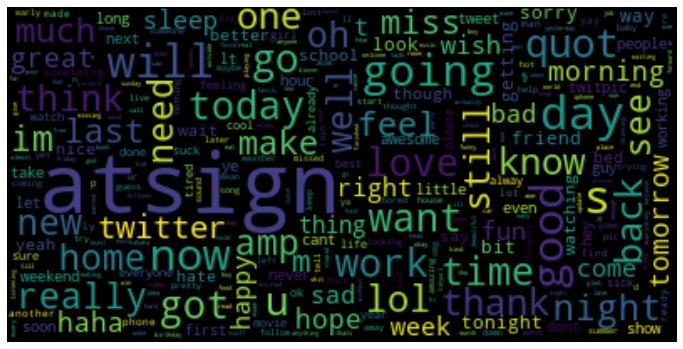

In [ ]:
#wordcloud to detect the most used words within train
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Combine all Sentences into one big text
text = " ".join(sentence for sentence in data['tweet'])

print (f"There are {len(text)} words in the combination of all sentences.")

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="black", collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 14541700 words in the combination of all sentences.


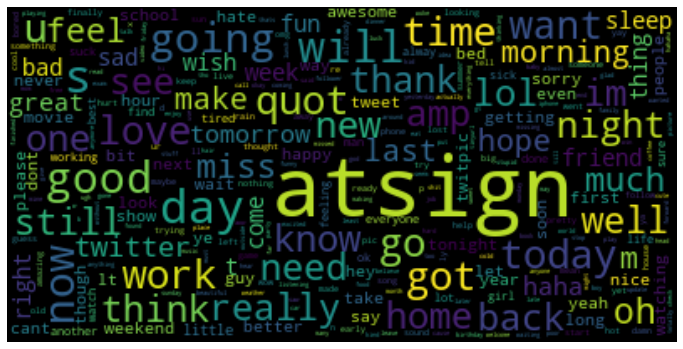

In [ ]:
#wordcloud to detect the most used words within test
import matplotlib.pyplot as plt
%matplotlib inline

# Combine all Sentences into one big text
text = " ".join(sentence for sentence in test['tweet'])

print (f"There are {len(text)} words in the combination of all sentences.")

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="black", collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

In [ ]:
#tokenisation of tweets
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['Tweet_tokenized'] = data['tweet'].apply(lambda x: tokenization(x.lower()))
data.head()

,id,sentiment,tweet,Tweet_tokenized
0,515629,1,atsign ashleyshakesit oh you are right licks ...,"[, atsign, ashleyshakesit, oh, you, are, right..."
1,440059,1,i heart karage curry,"[i, heart, karage, curry, ]"
2,291686,0,leaving nha trang in a few minutes,"[leaving, nha, trang, in, a, few, minutes, ]"
3,91198,0,its sunday morning and i am at work this has g...,"[its, sunday, morning, and, i, am, at, work, t..."
4,205125,1,done with the exams oh my such a nerve wrackin...,"[done, with, the, exams, oh, my, such, a, nerv..."


In [ ]:
#tokenisation of tweets
test['Tweet_tokenized'] = test['tweet'].apply(lambda x: tokenization(x.lower()))
test.head()

,id,tweet,Tweet_tokenized
0,498471,cool the lakers wins again,"[cool, the, lakers, wins, again, ]"
1,361243,atsign jonasbrothers hi it s 3 25 a m and i c...,"[, atsign, jonasbrothers, hi, it, s, 3, 25, a,..."
2,336568,gutted i just got a 2 for 1 off for boyzone ti...,"[gutted, i, just, got, a, 2, for, 1, off, for,..."
3,267033,atsign martingbedwards yes that swarm is high...,"[, atsign, martingbedwards, yes, that, swarm, ..."
4,185069,now listening to phantom of the opera original...,"[now, listening, to, phantom, of, the, opera, ..."


In [ ]:
#importing the stop words 
f = open('twitter-stopwords.txt', 'r')
content = f.read()
stopword = content.split()
print(stopword)
#stopword.extend(['today', 'day', 's', 't', 'll', 'u', 'm', 'a'])

['.com,.ly,.net,.org,aahh,aarrgghh,abt,accent,accented,accents,account,accounts,acne,activities,activity,ad,add,added,adding,adds,admission,admissions,ads,afaik,affiliate,affiliates,affirmation,affirmations,aft,afternoon,ago,ahead,ain,aint,aircon,album,albums,allergies,allergy,allow,allowed,allows,alot,am,angry,announcement,announcements,annoy,annoyed,annoys,anycase,anymore,app,apparently,approve,approved,approves,apps,april,area,areas,argh,arrive,arrived,arrives,article,articles,asia,asian,ask,asked,asks,ass,asses,ate,attempt,attempting,attempts,attend,attended,attends,august,auto,autoindustry,awesome,babeh,babies,baby,back,backed,bad,bag,bags,bai,balance,bank,banks,based,bcos,bcoz,bday,bed,bedroom,belong,belonged,belongs,big,bigger,biggest,billion,billons,birthday,birthdays,bit,biz,blah,bleh,bless,blessed,blk,blog,blogcatalog,blogger,bloggers,blogging,blogs,bloody,book,bored,boring,bottle,bottles,bought,box,boxes,boy,boys,break,breakfast,breakfasts,bright,bring,brings,bro,broke,broke

In [ ]:
#removing the stopwords
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['tweet_nonstop'] = data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,id,sentiment,tweet,Tweet_tokenized,tweet_nonstop
0,515629,1,atsign ashleyshakesit oh you are right licks ...,"[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right..."
1,440059,1,i heart karage curry,"[i, heart, karage, curry, ]","[i, heart, karage, curry, ]"
2,291686,0,leaving nha trang in a few minutes,"[leaving, nha, trang, in, a, few, minutes, ]","[leaving, nha, trang, in, a, few, minutes, ]"
3,91198,0,its sunday morning and i am at work this has g...,"[its, sunday, morning, and, i, am, at, work, t...","[its, sunday, morning, and, i, am, at, work, t..."
4,205125,1,done with the exams oh my such a nerve wrackin...,"[done, with, the, exams, oh, my, such, a, nerv...","[done, with, the, exams, oh, my, such, a, nerv..."


In [ ]:
#removing the stopwords 
test['tweet_nonstop'] = test['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
test.head()

,id,tweet,Tweet_tokenized,tweet_nonstop
0,498471,cool the lakers wins again,"[cool, the, lakers, wins, again, ]","[cool, the, lakers, wins, again, ]"
1,361243,atsign jonasbrothers hi it s 3 25 a m and i c...,"[, atsign, jonasbrothers, hi, it, s, 3, 25, a,...","[, atsign, jonasbrothers, hi, it, s, 3, 25, a,..."
2,336568,gutted i just got a 2 for 1 off for boyzone ti...,"[gutted, i, just, got, a, 2, for, 1, off, for,...","[gutted, i, just, got, a, 2, for, 1, off, for,..."
3,267033,atsign martingbedwards yes that swarm is high...,"[, atsign, martingbedwards, yes, that, swarm, ...","[, atsign, martingbedwards, yes, that, swarm, ..."
4,185069,now listening to phantom of the opera original...,"[now, listening, to, phantom, of, the, opera, ...","[now, listening, to, phantom, of, the, opera, ..."


In [ ]:
#stemming the tweets
ps = nltk.stem.SnowballStemmer('english')

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

data['Tweet_stemmed'] = data['tweet_nonstop'].apply(lambda x: stemming(x))
data.head()

,id,sentiment,tweet,Tweet_tokenized,tweet_nonstop,Tweet_stemmed
0,515629,1,atsign ashleyshakesit oh you are right licks ...,"[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right..."
1,440059,1,i heart karage curry,"[i, heart, karage, curry, ]","[i, heart, karage, curry, ]","[i, heart, karag, curri, ]"
2,291686,0,leaving nha trang in a few minutes,"[leaving, nha, trang, in, a, few, minutes, ]","[leaving, nha, trang, in, a, few, minutes, ]","[leav, nha, trang, in, a, few, minut, ]"
3,91198,0,its sunday morning and i am at work this has g...,"[its, sunday, morning, and, i, am, at, work, t...","[its, sunday, morning, and, i, am, at, work, t...","[it, sunday, morn, and, i, am, at, work, this,..."
4,205125,1,done with the exams oh my such a nerve wrackin...,"[done, with, the, exams, oh, my, such, a, nerv...","[done, with, the, exams, oh, my, such, a, nerv...","[done, with, the, exam, oh, my, such, a, nerv,..."


In [ ]:
#stemming the tweets
test['Tweet_stemmed'] = test['tweet_nonstop'].apply(lambda x: stemming(x))
test.head()

,id,tweet,Tweet_tokenized,tweet_nonstop,Tweet_stemmed
0,498471,cool the lakers wins again,"[cool, the, lakers, wins, again, ]","[cool, the, lakers, wins, again, ]","[cool, the, laker, win, again, ]"
1,361243,atsign jonasbrothers hi it s 3 25 a m and i c...,"[, atsign, jonasbrothers, hi, it, s, 3, 25, a,...","[, atsign, jonasbrothers, hi, it, s, 3, 25, a,...","[, atsign, jonasbroth, hi, it, s, 3, 25, a, m,..."
2,336568,gutted i just got a 2 for 1 off for boyzone ti...,"[gutted, i, just, got, a, 2, for, 1, off, for,...","[gutted, i, just, got, a, 2, for, 1, off, for,...","[gut, i, just, got, a, 2, for, 1, off, for, bo..."
3,267033,atsign martingbedwards yes that swarm is high...,"[, atsign, martingbedwards, yes, that, swarm, ...","[, atsign, martingbedwards, yes, that, swarm, ...","[, atsign, martingbedward, yes, that, swarm, i..."
4,185069,now listening to phantom of the opera original...,"[now, listening, to, phantom, of, the, opera, ...","[now, listening, to, phantom, of, the, opera, ...","[now, listen, to, phantom, of, the, opera, ori..."


In [ ]:
#lemmatizing the tweets
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['Tweet_lemmatized'] = data['tweet_nonstop'].apply(lambda x: lemmatizer(x))
data.head()

,id,sentiment,tweet,Tweet_tokenized,tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,515629,1,atsign ashleyshakesit oh you are right licks ...,"[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right...","[, atsign, ashleyshakesit, oh, you, are, right..."
1,440059,1,i heart karage curry,"[i, heart, karage, curry, ]","[i, heart, karage, curry, ]","[i, heart, karag, curri, ]","[i, heart, karage, curry, ]"
2,291686,0,leaving nha trang in a few minutes,"[leaving, nha, trang, in, a, few, minutes, ]","[leaving, nha, trang, in, a, few, minutes, ]","[leav, nha, trang, in, a, few, minut, ]","[leaving, nha, trang, in, a, few, minute, ]"
3,91198,0,its sunday morning and i am at work this has g...,"[its, sunday, morning, and, i, am, at, work, t...","[its, sunday, morning, and, i, am, at, work, t...","[it, sunday, morn, and, i, am, at, work, this,...","[it, sunday, morning, and, i, am, at, work, th..."
4,205125,1,done with the exams oh my such a nerve wrackin...,"[done, with, the, exams, oh, my, such, a, nerv...","[done, with, the, exams, oh, my, such, a, nerv...","[done, with, the, exam, oh, my, such, a, nerv,...","[done, with, the, exam, oh, my, such, a, nerve..."


In [ ]:
#lemmatizing the tweets
test['Tweet_lemmatized'] = test['tweet_nonstop'].apply(lambda x: lemmatizer(x))
test.head()

,id,tweet,Tweet_tokenized,tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,498471,cool the lakers wins again,"[cool, the, lakers, wins, again, ]","[cool, the, lakers, wins, again, ]","[cool, the, laker, win, again, ]","[cool, the, lakers, win, again, ]"
1,361243,atsign jonasbrothers hi it s 3 25 a m and i c...,"[, atsign, jonasbrothers, hi, it, s, 3, 25, a,...","[, atsign, jonasbrothers, hi, it, s, 3, 25, a,...","[, atsign, jonasbroth, hi, it, s, 3, 25, a, m,...","[, atsign, jonasbrothers, hi, it, s, 3, 25, a,..."
2,336568,gutted i just got a 2 for 1 off for boyzone ti...,"[gutted, i, just, got, a, 2, for, 1, off, for,...","[gutted, i, just, got, a, 2, for, 1, off, for,...","[gut, i, just, got, a, 2, for, 1, off, for, bo...","[gutted, i, just, got, a, 2, for, 1, off, for,..."
3,267033,atsign martingbedwards yes that swarm is high...,"[, atsign, martingbedwards, yes, that, swarm, ...","[, atsign, martingbedwards, yes, that, swarm, ...","[, atsign, martingbedward, yes, that, swarm, i...","[, atsign, martingbedwards, yes, that, swarm, ..."
4,185069,now listening to phantom of the opera original...,"[now, listening, to, phantom, of, the, opera, ...","[now, listening, to, phantom, of, the, opera, ...","[now, listen, to, phantom, of, the, opera, ori...","[now, listening, to, phantom, of, the, opera, ..."


In [ ]:
#cleaning the text 
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) 
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  
    return text

In [ ]:
#countVectorizer = CountVectorizer(analyzer=clean_text) 
#countVector = countVectorizer.fit_transform(data['tweet'])
#print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

In [ ]:
#countVector_Test = countVectorizer.fit_transform(test['tweet'])
#print('{} Number of tweets has {} words'.format(countVector_Test.shape[0], countVector_Test.shape[1]))

In [ ]:
X = data['Tweet_lemmatized'].apply(lambda x: ' '.join(x)) 
y = data['sentiment']
test_X = test['Tweet_lemmatized'].apply(lambda x: ' '.join(x)) 

In [ ]:
#splitting the data into test and train for in sample prediction
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=100000)


for i,j in splitter.split(X,y):     #this will split the index
    X_train = X.iloc[i]
  #  X_train_saved = X.iloc[train] # Create a copy since we will be overwriting X_train
    y_train = y.iloc[i]
    X_test = X.iloc[j]
 #   X_test_saved = X.iloc[test]   # Create a copy since we will be overwriting X_test
    y_test = y.iloc[j]
    
# Let's see     
print(y_train.value_counts())  
print(y_test.value_counts())

1    179200
0    179200
Name: sentiment, dtype: int64
1    44800
0    44800
Name: sentiment, dtype: int64


In [ ]:
#TFIDF vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = stopword, ngram_range=(1, 2))

## Overwrite the X_train and X_test
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

/Library/Python/3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aahh', 'aarrgghh', 'abt', 'accent', 'accented', 'accents', 'account', 'accounts', 'acne', 'activities', 'activity', 'ad', 'add', 'added', 'adding', 'adds', 'admission', 'admissions', 'ads', 'afaik', 'affiliate', 'affiliates', 'affirmation', 'affirmations', 'aft', 'afternoon', 'ago', 'ahead', 'ain', 'aint', 'aircon', 'album', 'albums', 'allergies', 'allergy', 'allow', 'allowed', 'allows', 'alot', 'am', 'angry', 'announcement', 'announcements', 'annoy', 'annoyed', 'annoys', 'anycase', 'anymore', 'app', 'apparently', 'approve', 'approved', 'approves', 'apps', 'april', 'area', 'areas', 'argh', 'arrive', 'arrived', 'arrives', 'article', 'articles', 'asia', 'asian', 'ask', 'asked', 'asks', 'ass', 'asses', 'ate', 'attempt', 'attempting', 'attempts', 'attend', 'attended', 'attends', 'august', 'auto', 'au

In [ ]:
#LOGISTIG REGRESSTION WITH L2 PENALISATION
from sklearn.linear_model import LogisticRegression
ml_model = LogisticRegression(penalty='l2', C=3.75, solver='saga', random_state=0) #l2 3.75
ml_model.fit(X_train, y_train)

LogisticRegression(C=3.75, random_state=0, solver='saga')

In [ ]:
y_train_predicted = pd.Series(ml_model.predict(X_train))
y_train_probs = ml_model.predict_proba(X_train)[:, 1]

In [ ]:
ml_model.score(X_train, y_train)

0.9468833705357143

In [ ]:
y_predicted = ml_model.predict(X_test)

In [ ]:
score = ml_model.score(X_test, y_test)
print(round(score,4)*100)

81.63


In [ ]:
test_X = vectorizer.transform(test_X)

In [ ]:
y_pred = ml_model.predict(test_X)

In [ ]:
test['sentiment'] = y_pred

In [ ]:
test = test.drop(columns = ['tweet', 'Tweet_tokenized', 'tweet_nonstop', 'Tweet_stemmed', 'Tweet_lemmatized'])

In [ ]:
#test.to_csv(r'/Users/leftstories/Documents/My_Docs/FS_Study_Material/ML/Assignment 4/8447407.csv')

In [ ]:
test.head(10)

,id,sentiment
0,498471,1
1,361243,0
2,336568,0
3,267033,1
4,185069,1
5,452241,1
6,290270,0
7,214537,1
8,382743,0
9,155002,1
